# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [92]:
import pandas as pd
                    
df = pd.read_csv('/Users/jodelcornelio/Downloads/EDA_human_temperature/data/human_body_temperature.csv')

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
Mean Temperature:  98.24923076923078


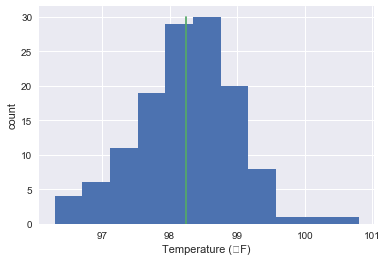

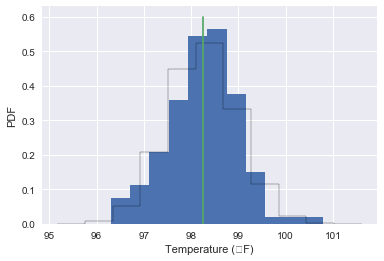

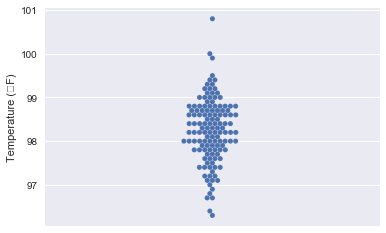

In [14]:
# Your work here.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

CW_Mean_Temp = 98.6

# Is the distribution of body temperatures normal?
print(df.head())
sns.set()
mean_T  = np.mean(df['temperature'])
std_T  = np.std(df['temperature'])
print("Mean Temperature: ",mean_T)
n_data =len(df['temperature'])
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

sample = np.random.normal(mean_T, std_T, size=100000)

plt.hist(df['temperature'], bins = n_bins)
plt.xlabel('Temperature (∘F)')
plt.ylabel('count')
plt.plot(np.array([mean_T,mean_T]),np.array([0,30]))
plt.show()

plt.hist(df['temperature'], bins = n_bins, normed = True )
plt.hist(sample, bins = n_bins, normed = True, histtype = 'step', color = 'black' )
plt.xlabel('Temperature (∘F)')
plt.ylabel('PDF')
plt.plot(np.array([mean_T,mean_T]),np.array([0,0.6]))
plt.show()

sns.swarmplot(y=df['temperature'])
plt.ylabel('Temperature (∘F)')
plt.show()

0.0640566146952
0.0636389316079
Bootstrap Mean Body Temperature:  98.2491775385
Carl Wunderlich  Mean Body Temperature:  98.6


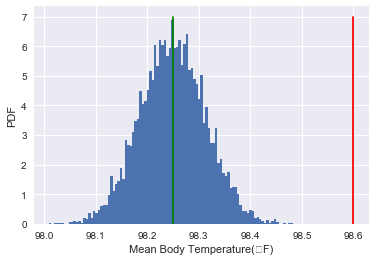

p =  0.0
T score:  0.00480270411161
p from T score:  0.996168011271
95% confidence interval = [ 98.12615385  98.37307692] ∘F


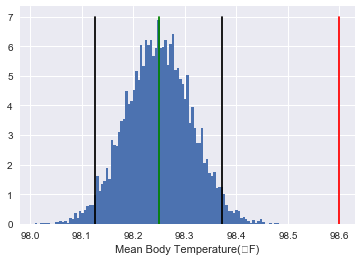

In [17]:
def bootstrap_replicate_1d(data, func1, func2):
    D = (np.random.choice(data, size=len(data)))
    return func1(D), func2(D)

def draw_bs_reps(data, func1, func2, size=1):
    bs_replicates_1 = np.empty(size)
    bs_replicates_2 = np.empty(size)
    for i in range(size):
        bs_replicates_1[i],bs_replicates_2[i]= bootstrap_replicate_1d(data, func1,func2)
    return bs_replicates_1,bs_replicates_2

bs_replicates_mean,bs_replicates_std= draw_bs_reps(df['temperature'], np.mean, np.std, size=10000)

#a bootstrap hypothesis test
BootStrap_Mean = np.mean(bs_replicates_mean)
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)
bs_std = np.std(bs_replicates_mean)
print(bs_std)
print("Bootstrap Mean Body Temperature: ",BootStrap_Mean)
print("Carl Wunderlich  Mean Body Temperature: ",CW_Mean_Temp)
# Make a histogram of the results
n_data =len(bs_replicates_mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

plt.hist(bs_replicates_mean, bins=n_bins, normed=True)
plt.plot(np.array([BootStrap_Mean,BootStrap_Mean]),np.array([0,7]), color = 'green')
plt.plot(np.array([CW_Mean_Temp,CW_Mean_Temp]),np.array([0,7]),color = 'red')
plt.xlabel('Mean Body Temperature(∘F)')
plt.ylabel('PDF')
plt.show()

p = np.sum(bs_replicates_mean >= CW_Mean_Temp) / 10000
print('p = ', p)


T_score_CW = (CW_Mean_Temp-mean_T)/(std_T*np.sqrt(n_data))
print('T score: ',T_score)
print('p from T score: ',stats.norm.sf(abs(T_score))*2)

plt.hist(bs_replicates_mean, bins=n_bins, normed=True)
plt.plot(np.array([BootStrap_Mean,BootStrap_Mean]),np.array([0,7]), color = 'green')
plt.plot(np.array([CW_Mean_Temp,CW_Mean_Temp]),np.array([0,7]),color = 'red')
plt.xlabel('Mean Body Temperature(∘F)')
conf_int = np.percentile(bs_replicates_mean, [2.5, 97.5])
print('95% confidence interval =', conf_int, '∘F')
plt.plot(np.array([conf_int[0],conf_int[0]]),np.array([0,7]),color = 'black')
plt.plot(np.array([conf_int[1],conf_int[1]]),np.array([0,7]),color = 'black')
plt.show()

10 Sample Mean Body Temperature:  98.26
Bootstrap Mean Body Temperature:  98.2486696154
Carl Wunderlich  Mean Body Temperature:  98.6


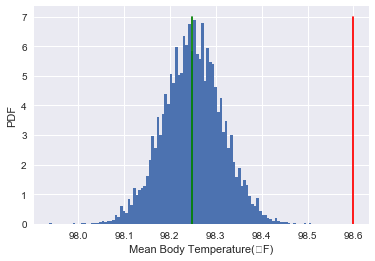

10 sample p nfrom Bootstrap Analysis =  0.0
10 sample T score:  0.188193163177
10 sample p from T score:  0.850725231731


In [42]:
#10 SAMPLE TEST
D = (np.random.choice(df['temperature'], size=10))
mean_D  = np.mean(D)
std_D  = np.std(D)
print("10 Sample Mean Body Temperature: ",mean_D )

bs_replicates_mean,bs_replicates_std= draw_bs_reps(df['temperature'], np.mean, np.std, size=10000)

#a bootstrap hypothesis test
BootStrap_Mean = np.mean(bs_replicates_mean)
print("Bootstrap Mean Body Temperature: ",BootStrap_Mean)
print("Carl Wunderlich  Mean Body Temperature: ",CW_Mean_Temp)

# Make a histogram of the results
n_data =len(bs_replicates_mean)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
plt.hist(bs_replicates, bins=n_bins, normed=True)
plt.plot(np.array([BootStrap_Mean,BootStrap_Mean]),np.array([0,7]), color = 'green')
plt.plot(np.array([CW_Mean_Temp,CW_Mean_Temp]),np.array([0,7]),color = 'red')
plt.xlabel('Mean Body Temperature(∘F)')
plt.ylabel('PDF')
plt.show()

p = np.sum(bs_replicates_mean >= CW_Mean_Temp) / 10000
print('10 sample p nfrom Bootstrap Analysis = ', p)

T_score_10 = (CW_Mean_Temp-mean_D)/(std_D*np.sqrt(len(D)))
print("10 sample T score: ",T_score_10)
print('10 sample p from T score: ',stats.norm.sf(abs(T_score_10))*2)


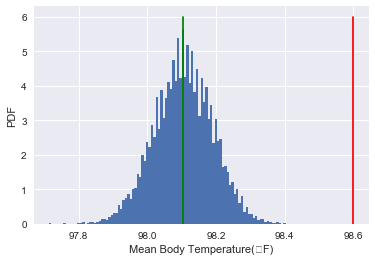

Mean Male Body Temperature from Data:  98.1046153846154
Bootstrap Mean Male Body Temperature:  98.1051873846
Male p from Bootstrap Analysis =  0.0
Male T score:  0.0635244231714
Male p from T score:  0.949348911638


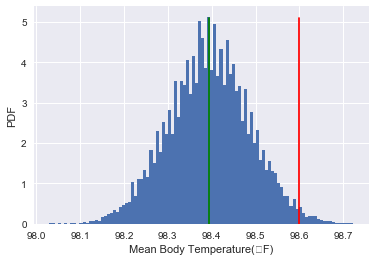

Mean Female Body Temperature from Data:  98.39384615384613
Bootstrap Mean Female Body Temperature:  98.3939043077
Female p from Bootstrap Analysis =  0.013
Female T score:  0.0264356295185
Female p from T score:  0.978909875827


In [41]:
F = df.loc[df['gender'] == 'F']
mean_T_F  = np.mean(F['temperature'])
std_T_F  = np.std(F['temperature'])
M = df.loc[df['gender'] == 'M']
mean_T_M = np.mean(M['temperature'])
std_T_M  = np.std(M['temperature'])



bs_replicates_mean_F,bs_replicates_std_F= draw_bs_reps(F['temperature'], np.mean, np.std, size=10000)
bs_replicates_mean_M,bs_replicates_std_M= draw_bs_reps(M['temperature'], np.mean, np.std, size=10000)

#a bootstrap hypothesis test
BootStrap_Mean_F = np.mean(bs_replicates_mean_F)
BootStrap_Mean_M = np.mean(bs_replicates_mean_M)


plt.hist(bs_replicates_mean_M, bins=n_bins, normed=True)
plt.plot(np.array([BootStrap_Mean_M,BootStrap_Mean_M]),np.array([0,6]), color = 'green')
plt.plot(np.array([CW_Mean_Temp,CW_Mean_Temp]),np.array([0,6]),color = 'red')
plt.xlabel('Mean Body Temperature(∘F)')
plt.ylabel('PDF')
plt.show()

print("Mean Male Body Temperature from Data: ",mean_T_M )
print("Bootstrap Mean Male Body Temperature: ",BootStrap_Mean_M)
p = np.sum(bs_replicates_mean_M >= CW_Mean_Temp) / 10000
print('Male p from Bootstrap Analysis = ', p)
T_score_M = (CW_Mean_Temp-mean_T_M)/(std_D*np.sqrt(len(M)))
print("Male T score: ",T_score_M)
print('Male p from T score: ',stats.norm.sf(abs(T_score_M))*2)


plt.hist(bs_replicates_mean_F, bins=n_bins, normed=True)
plt.plot(np.array([BootStrap_Mean_F,BootStrap_Mean_F]),np.array([0,5.1]), color = 'green')
plt.plot(np.array([CW_Mean_Temp,CW_Mean_Temp]),np.array([0,5.1]),color = 'red')
plt.xlabel('Mean Body Temperature(∘F)')
plt.ylabel('PDF')
plt.show()
print("Mean Female Body Temperature from Data: ",mean_T_F )
print("Bootstrap Mean Female Body Temperature: ",BootStrap_Mean_F)
p = np.sum(bs_replicates_mean_F >= CW_Mean_Temp) / 10000
print('Female p from Bootstrap Analysis = ', p)
T_score_F = (CW_Mean_Temp-mean_T_F)/(std_D*np.sqrt(len(F)))
print("Female T score: ",T_score_F)
print('Female p from T score: ',stats.norm.sf(abs(T_score_F))*2)